In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as font_manager

In [23]:
font = font_manager.FontProperties(family='Arial',
                                   style='normal', size=12)

In [36]:
class BCC_BreakDown_Total:
    def __init__(self):
        self.graphs=[]
        self.firstCC = dict()
        self.ET=dict()
        self.Compute=dict()
        self.CriticalCC = dict()
    def read_data(self, data, graph_name):
        data=np.array(data)
        data = np.transpose(data)
        self.firstCC[graph_name] = data[0]
        self.ET[graph_name] = data[1]
        self.Compute[graph_name] = data[2]
        self.CriticalCC[graph_name] = data[3]
    def read_file(self, file):
        f = open(file, 'r')
        lines = f.readlines()
        for i in range(int(len(lines)/3)):
            data = []
            graph_name = lines[3*i].replace('\n','')
            self.graphs.append(graph_name)
            data.append(list(eval(lines[3*i+2].replace('\n','')))) #gbbs's data
            data.append(list(eval(lines[3*i+1].replace('\n','')))) #our's data
            self.read_data(data, graph_name)
    def draw_breakdown(self):
        labels = ['GBBS','Ours']
        i = 0
        fig, ax = plt.subplots(3,9, figsize=(12, 4), sharex=True)
        ax = ax.flatten()
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.3)
#         fig.tight_layout(pad = 0.8)
        x = [0.25,0.5]
        colors = list(sns.color_palette('tab10'))
        rects = []
#         first cc	multi-bfs	preorder	second cc
        for g in self.graphs:
            ax[i].bar(x, self.firstCC[g], width = 0.15, label = "First CC", color=colors[0])
            bottom_bar = (self.firstCC[g]).copy()
            ax[i].bar(x, self.ET[g], bottom = bottom_bar, width = 0.15, label='Rooting', color=colors[3])
            bottom_bar += self.ET[g]
            ax[i].bar(x, self.Compute[g], bottom = bottom_bar, width = 0.15, label='Tagging', color=colors[2])
            bottom_bar += self.Compute[g]
            rect = ax[i].bar(x, self.CriticalCC[g], bottom = bottom_bar, width = 0.15, label='Last CC', color=colors[1])
            rects.append(rect)
            ax[i].set_title(g, fontname='Arial',fontsize=12, y=0.95)
            ax[i].set_xticks(x,labels , fontsize=12, rotation=60,fontname='Arial')
            ax[i].tick_params(axis = 'y', pad = 0.1)
            i+=1
                
#         ax[7].bar_label(rects[7],labels = ['X',''], padding=3)
        ax[5].legend(loc='upper right',bbox_to_anchor=(3.5,1.7), ncol=4, prop=font)
        plt.savefig("BCC_breakdown_total.pdf", bbox_inches='tight')
        plt.show()

In [37]:
BCC = BCC_BreakDown_Total()

In [38]:
BCC.read_file('BCC_break_total.txt')

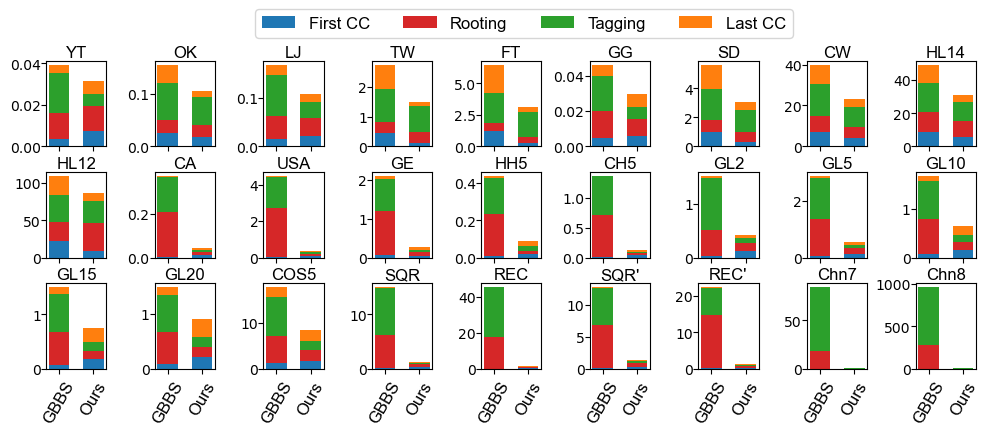

In [39]:
BCC.draw_breakdown()

In [40]:
class BCC_LocalBreakDown_Total:
    def __init__(self):
        self.graphs=[]
        self.firstCC = dict()
        self.ET=dict()
        self.Compute=dict()
        self.CriticalCC = dict()
    def read_data(self, data, graph_name):
        data=np.array(data)
        data = np.transpose(data)
        self.firstCC[graph_name] = data[0]
        self.ET[graph_name] = data[1]
        self.Compute[graph_name] = data[2]
        self.CriticalCC[graph_name] = data[3]
    def read_file(self, file):
        f = open(file, 'r')
        lines = f.readlines()
        for i in range(int(len(lines)/3)):
            data = []
            graph_name = lines[3*i].replace('\n','')
            self.graphs.append(graph_name)
            data.append(list(eval(lines[3*i+2].replace('\n','')))) #original
            data.append(list(eval(lines[3*i+1].replace('\n','')))) #optimized
            self.read_data(data, graph_name)
    def draw_breakdown(self):
        labels = ['Orig.','Opt.']
        i = 0
        fig, ax = plt.subplots(3,9, figsize=(12, 4), sharex=True)
        ax = ax.flatten()
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.3)
#         x = [0.5,1]
        x=[0.25,0.5]
        colors = list(sns.color_palette('tab10'))
        for g in self.graphs:
            ax[i].bar(x, self.firstCC[g], width = 0.15, label = "First CC", color=colors[0])
            bottom_bar = (self.firstCC[g]).copy()
            ax[i].bar(x, self.ET[g], bottom = bottom_bar, width = 0.15, label='Rooting', color=colors[3])
            bottom_bar += self.ET[g]
            ax[i].bar(x, self.Compute[g], bottom = bottom_bar, width = 0.15, label='Tagging', color=colors[2])
            bottom_bar += self.Compute[g]
            ax[i].bar(x, self.CriticalCC[g], bottom = bottom_bar, width = 0.15, label='Last CC', color=colors[1])
            ax[i].set_title(g, fontname='Arial',fontsize=12, y=0.95)
            ax[i].set_xticks(x,labels , fontsize=14, rotation=60,fontname='Arial')
            ax[i].tick_params(axis = 'y', pad = 0.1)
            i+=1
                
        ax[5].legend(loc='upper right',bbox_to_anchor=(3.5,1.75), ncol=4, prop=font)
        plt.savefig("BCC_OptBreakdown_total.pdf", bbox_inches='tight')
        plt.show()

In [41]:
BCC = BCC_LocalBreakDown_Total()

In [42]:
BCC.read_file('Local_Breakdown.txt')

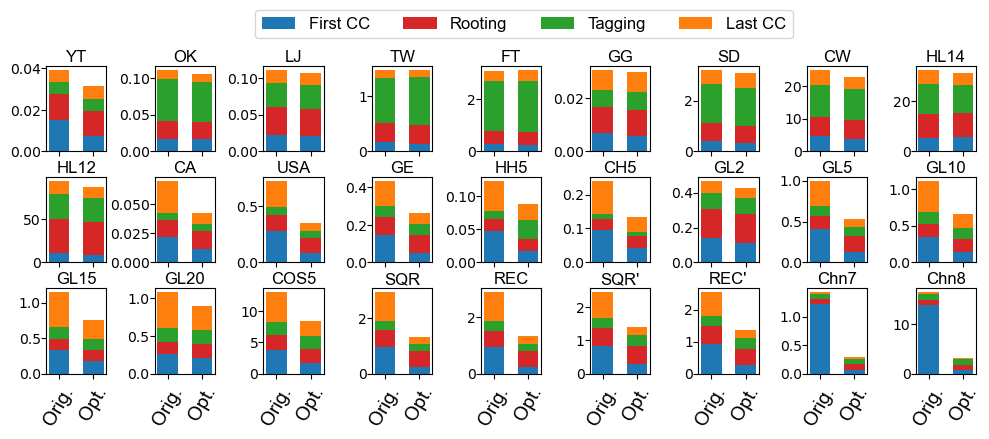

In [43]:
BCC.draw_breakdown()

In [154]:
class BCC_FirstCC_Total:
    def __init__(self):
        self.graphs=[]
        self.firstCC = dict()
    def read_data(self, data, graph_name):
        self.firstCC[graph_name] = np.array([data[2],data[0],data[1]])
    def read_file(self, file):
        f = open(file, 'r')
        lines = f.readlines()
        for i in range(int(len(lines)/2)):
            graph_name = lines[2*i].replace('\n','')
            self.graphs.append(graph_name)
            data = (list(eval(lines[2*i+1].replace('\n','')))) #plain, local, GBBS 
            self.read_data(data, graph_name)
            
    def draw_breakdown(self):
        labels = ['GBBS','Orig.','Opt.']
        i = 0
        fig, ax = plt.subplots(4,6, figsize=(8, 6), sharex=True)
        ax = ax.flatten()
        plt.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)
        x = [0.5,1, 1.5]
        colors = list(sns.color_palette('tab10'))
        rects = []
        for g in self.graphs:
            rect = ax[i].bar(x, self.firstCC[g], width = 0.2, label = "First CC", color=colors[0])
            rects.append(rect)
            ax[i].set_title(g, fontname='Arial',fontsize=14, y=0.95)
            ax[i].set_xticks(x,labels , fontsize=14, rotation=60,fontname='Arial')
            if (i == 10):
                ax[i].set_yticks([0,0.03,0.06])
            ax[i].tick_params(axis = 'y', pad = 0.1)
            i+=1
                
        ax[7].bar_label(rects[7],labels = ['X','',''], padding=3)
#         ax[5].legend(loc='upper right',bbox_to_anchor=(1.1,1.75), ncol=4, prop=font)
        plt.savefig("BCC_FirstCC_total.pdf", bbox_inches='tight')
        plt.show()

In [155]:
BCC_FirstCC = BCC_FirstCC_Total()
BCC_FirstCC.read_file('FirstCC_total.txt')

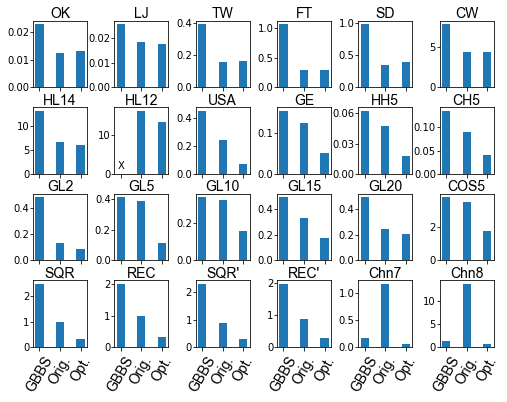

In [156]:
BCC_FirstCC.draw_breakdown()

In [175]:
class BCC_CC_Total:
    def __init__(self):
        self.graphs=[]
        self.firstCC = dict()
        self.lastCC = dict()
    def read_data(self, data, graph_name):
        data=np.array(data)
        data = np.transpose(data)
        self.firstCC[graph_name] = data[0]
        self.lastCC[graph_name] = data[1]
    def read_file(self, file):
        f = open(file, 'r')
        lines = f.readlines()
        for i in range(int(len(lines)/3)):
            data = []
            graph_name = lines[3*i].replace('\n','')
            self.graphs.append(graph_name)
            data.append(list(eval(lines[3*i+1].replace('\n','')))) #origin
            data.append(list(eval(lines[3*i+2].replace('\n','')))) #optimized
            self.read_data(data, graph_name)
    def draw_breakdown(self):
        labels = ['Orig.','Opt.']
        i = 0
        fig, ax = plt.subplots(4,6, figsize=(8, 6), sharex=True)
        ax = ax.flatten()
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)
#         fig.tight_layout(pad = 0.8)
        x = [0.5,1]
        colors = list(sns.color_palette('tab10'))
#         first cc	multi-bfs	preorder	second cc
        for g in self.graphs:
            ax[i].bar(x, self.firstCC[g], width = 0.2, label = "First CC", color=colors[0])
            bottom_bar = (self.firstCC[g]).copy()
            ax[i].bar(x, self.lastCC[g], bottom = bottom_bar, width = 0.2, label='Last CC', color=colors[1])
            ax[i].set_title(g, fontname='Arial',fontsize=14, y=0.95)
            ax[i].set_xticks(x,labels , fontsize=14, rotation=60,fontname='Arial')
            ax[i].tick_params(axis = 'y', pad = 0.1)
            i+=1
                
        ax[5].legend(loc='upper right',bbox_to_anchor=(-1.0,1.75), ncol=4, prop=font)
        plt.savefig("BCC_CC_total.pdf", bbox_inches='tight')
        plt.show()

In [176]:
BCC_CC = BCC_CC_Total()
BCC_CC.read_file('BCC_CC_total.txt')

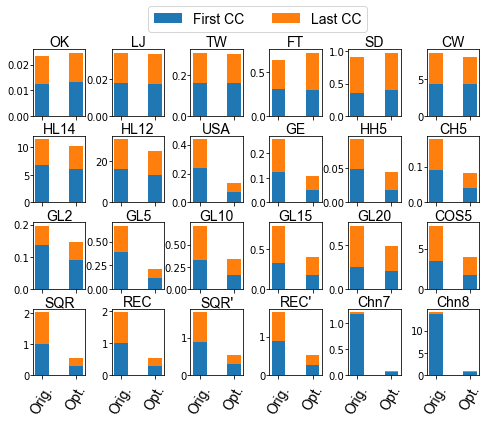

In [177]:
BCC_CC.draw_breakdown()